<a href="https://colab.research.google.com/github/Kiritiaajd/ML-Algorithms/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [199]:
xx = np.array([-0.51 , 51.2])
yy = np.array([0.33 , 51.6])

means = [xx.mean() , yy.mean()]
stds = [xx.std() /3 , yy.std() /3]

corr = 0.8

cov = [[stds[0]**2 , corr * stds[0] * stds[1]] , [corr * stds[0] * stds[1] , stds[1]**2]]

m = np.random.multivariate_normal(means, cov, 1000).T


In [200]:
df  = pd.DataFrame()


In [201]:
df['exp(in months)'] = m[0]
df['salary(in thousands)'] = m[1]

In [202]:
df.head()

,exp(in months),salary(in thousands)
0,14.746159,13.119705
1,40.329382,39.009375
2,14.648837,14.332722
3,30.450288,23.719010
4,33.244132,42.545095


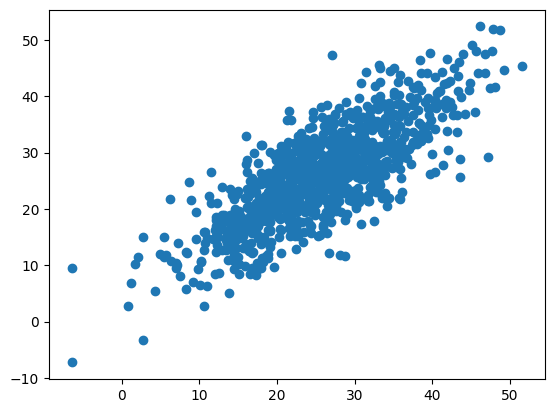

In [203]:
plt.scatter(df['exp(in months)'] , df['salary(in thousands)'])

In [204]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [205]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [207]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [208]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()


In [209]:
regressor.fit(X_train,y_train)

LinearRegression()

In [210]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None )

LinearRegression()

In [211]:
y_pred=regressor.predict(X_test)

In [212]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.7919820628945372
5.7840213765658355


In [213]:
# df_error=pd.DataFrame()
# df_error['y_test']=y_train
# df_error['y_test']=y_test
# df_error.shape

In [214]:
df_error

,y_test
0,26.996850
1,15.399339
2,50.986291
3,11.206562
4,41.185101
...,...
795,30.951319
796,11.063611
797,35.044979
798,24.784542


In [215]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.421951007028071

In [216]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

29.88118993897173

In [217]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

5.466368990378506

In [218]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5744887599538073

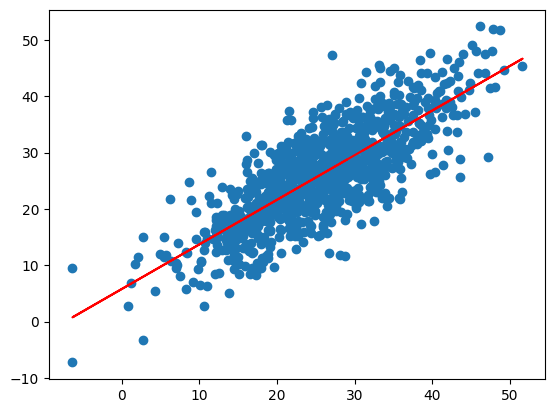

In [219]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])